In [29]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer




In [30]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [11]:
# df['Open_report phase_2'] = df['Open_report phase_2'].astype(str)


# df['Open_report phase_2'].dtypes # the type is object probably because there are mixed types inside the column (text, numbers, etc.)


In [12]:
# # Saving the open answers column into variable

# answers = df['Open_report']

# answers

### Checking basic distributions

In [13]:
# # Average length of each answer

# answers.str.len().hist()



In [14]:
# Average length of each word

answers.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

NameError: name 'answers' is not defined

### Stopwords

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/konsta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

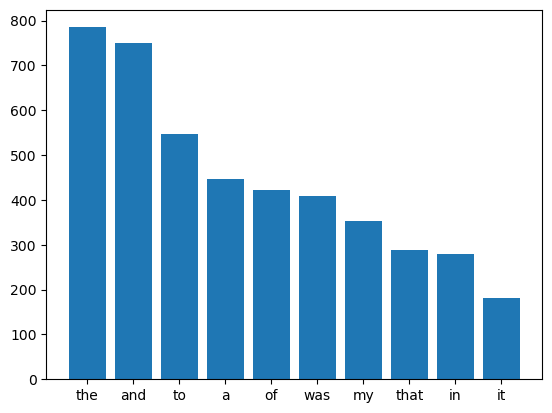

In [ ]:
corpus = []
words = answers.str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

#print(dic)

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<Axes: >

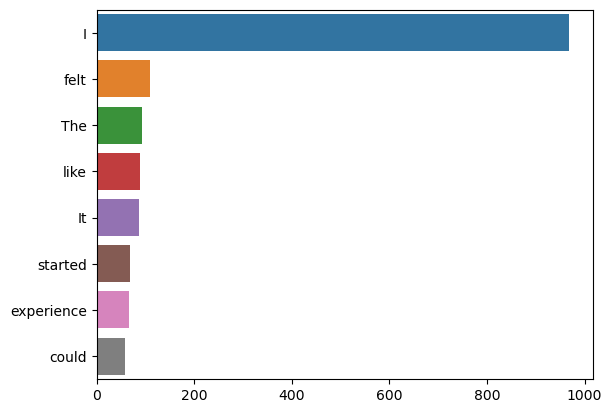

In [ ]:
from collections import  Counter


counter=Counter(corpus)
most=counter.most_common()
x, y=[], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
# Most common ngrams

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


<Axes: >

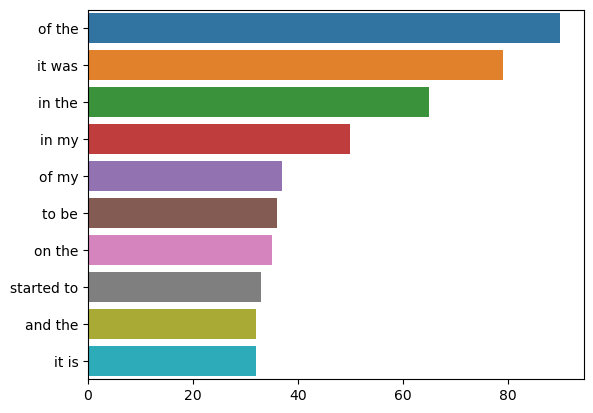

In [ ]:
# Checking top bigrams

top_n_bigrams=get_top_ngram(answers,2)[:10] 

x,y=map(list,zip(*top_n_bigrams)) 

sns.barplot(x=y,y=x)

<Axes: >

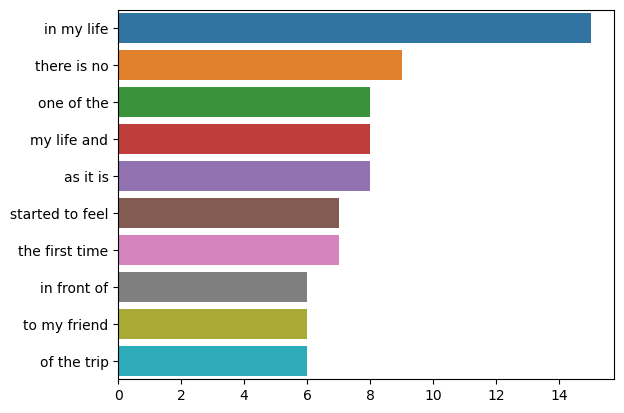

In [ ]:
# Checking top trigrams

top_tri_grams=get_top_ngram(answers,n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

### Pre-processing


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')



corpus=[]

stem=PorterStemmer()
lem=WordNetLemmatizer()

for news in answers:
    words=[w for w in word_tokenize(answers) if (w not in stop)]

    words=[lem.lemmatize(w) for w in words if len(w)>2]

    corpus.append(words)



corpus

[nltk_data] Downloading package punkt to /Users/konsta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/konsta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'PorterStemmer' is not defined

In [ ]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

### The LDA model

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

# New round with spell-corrected data including sentiment analysis

In [3]:
df = pd.read_csv('survey data.csv')

df

,variant,group,age,gender_1F_2M_3O,education_level,education_level_otherSpecification,income_level,Country_birth,English_proficiency,religion,religion_other_spec,meditation_freq,meditation_howlong,medit_type_silent,medit_type_voice,medit_type_breath,medit_type_body,medit_type_mindfulness,bg_medit_type_other,classicalPsych_frequency,TimeSinceLastClassicalPsych,Psychiatric_No_disclosure,Psychiatric_severe_depression,Psychiatric_bipolar,Psychiatric_psychosis,Psychiatric_anxiety,Psychiatric_ASD,Psychiatric_OCD,Psychiatric_ADHD,psychiatric_other,psychiatric_selfdiagnosed,substance_use_problem,ESP1_INV,2 ESP,3 ESP,4 ESP,exp_LSD,exp_psilocybin,exp_ayahuasca,exp_DMT,exp_5meoDMT,exp_mescaline,exp_ibogaine,exp_salvia,exp_mdma,exp_ketamine,exp_cannabis,other_drug_dummy,exp_other_drug,how_many_drugs,exp_drug_dose,exp_drug_dose_specific,exp_drug_intensity,exp_drug_confidence,exp_medit_silent,exp_medit_voice,exp_medit_breath,exp_medit_body,exp_medit_mindfulness,exp_other_medit,exp_meditation_technique_specific,exp_medit_drug,exp_medit_drugSpecification,exp_when,exp_where,exp_who,exp_guide,exp_purpose_nospecific,exp_purpose_relax_enjoy,exp_purpose_spiritual,exp_purpose_therapeutic,exp_purpose_curiosity,exp_purpose_social,exp_purpose_selfimprovement,exp_purpose_distraction,exp_purpose_other,exp_other_purpose,exp_planned,exp_expect,exp_drug_meditation,exp_drug_medit_silent,exp_drug_medit_voice,exp_drug_medit_breath,exp_drug_medit_body,exp_drug_medit_mindfulness,exp_drug_medit_otherSpecify,Open_report,Open_report typo-corrected,open_report_characters,body_yes_no,Thematic_body,insight_yes_no,Thematic_insights,connection_or_alienation_yes_no,Thematic_connection,preposts_satisfied,preposts_positive,preposts_negative,preposts_meaning,preposts_peace_harmony,prepost_bodydissat,prepost_bodyappre,prepost_embodiment,MEQ30_Q1_mystical,MEQ30_Q2_mystical,MEQ30_Q3_mystical,MEQ30_Q4_mystical,MEQ30_Q5_mystical,MEQ30_Q6_mystical,MEQ30_Q7_mystical,MEQ30_Q8_mystical,MEQ30_Q9_mystical,MEQ30_Q10_mystical,MEQ30_Q11_mystical,MEQ30_Q12_mystical,MEQ30_Q13_mystical,MEQ30_Q14_mystical,MEQ30_Q15_mystical,MEQ30_Q16_positive_mood,MEQ30_Q17_positive_mood,MEQ30_Q18_positive_mood,MEQ30_Q19_positive_mood,MEQ30_Q20_positive_mood,MEQ30_Q21_positive_mood,MEQ30_Q22_transcendence,MEQ30_Q23_transcendence,MEQ30_Q24_transcendence,MEQ30_Q25_transcendence,MEQ30_Q26_transcendence,MEQ30_Q27_transcendence,MEQ30_Q28_ineffability,MEQ30_Q29_ineffability,MEQ30_Q30_ineffability,MEQ30_sum,WEMWBS_optimistic,WEMWBS_useful,WEMWBS_relaxed,WEMWBS_dealing_w_problems,WEMWBS_thinking_clearly,WEMWBS_close_to_others,WEMWBS_make_up_my_own_mind,PoMS_1,PoMS_2,PoMS_3,PoMS_4,PoMS_5_INV,PoMS_6,PoMS_7_INV,BAS1,BAS2,BAS3,BAS4,BAS5,BAS6,BAS7,BAS8,BAS9,BAS10,psy_flex1,psy_flex2,psy_flex3,psy_flex4,psy_flex5,psy_flex6,SVS_1_Power,userid
0,med1,meditation,64,2,4,NaN,2,Sweden,1,3,NaN,6,6,0,0,0,0,1,NaN,3,0,0,0,0,0,1,0,0,0,NaN,NaN,999,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,"Anapana, vipassana",1.0,NaN,6,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is a fundamental concept in Buddhism cal...,There is a fundamental concept in Buddhism cal...,408,1,I went into this in the previous question.,1,A deep understanding of what anicca means.,3,NaN,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,47.0,4,4,4,4,4,4,4,3,3,3,3,2,3,1,3,3,4,3,4,2,2,2,3,2,5,5,4,4,4,4,7,6097026029595349a
1,med1,meditation,31,2,7,NaN,4,India,1,5,NaN,4,5,0,0,0,0,1,Vipassana,0,0,0,0,0,0,0,0,0,0,NaN,Mild anxiety,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,Vipassana,1.0,NaN,7,5,3,1,0,0,1,0,0,0,0,0,0,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I developed all positive feelings. All thought...,I developed all positive feelings. All thought...,158,3,NaN,1,I realized I love my family. I realized that I...,2,NaN,3.0,5.0,

In [4]:
# Only keeping the columns that we need

columns_to_keep = ['group', 'Open_report typo-corrected']

df = df[columns_to_keep] 

df

,group,Open_report typo-corrected
0,meditation,There is a fundamental concept in Buddhism cal...
1,meditation,I developed all positive feelings. All thought...
2,meditation,I had recently lost my father unexpectedly. A ...
3,meditation,There was an objective experience of the self ...
4,meditation,Deep abiding peace with understanding of the i...
...,...,...
208,psychedelics,"It's impossible to write down what happened, a..."
209,psychedelics,You are okay I took approximately half of what...
210,psychedelics,There was an intention setting and intake appt...
211,psychedelics,My memory is quite vague as it was almost 5 ye...


In [5]:
# Dropping rows where open report is empty
df = df.dropna(subset=['Open_report typo-corrected'])

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 212
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   group                       203 non-null    object
 1   Open_report typo-corrected  203 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [7]:
df['group'] = df['group'].astype('category')
df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_37395/3570789679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['group'].astype('category')
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_37395/3570789679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')


In [8]:
# Creating separate dataframes for psychedelics and meditation groups

psyke = df[df['group']=='psychedelics']

medi = df[df['group']=='meditation']


psyke.head(5)

,group,Open_report typo-corrected
66,psychedelics,I was in my friends' apartment when we took ls...
67,psychedelics,You mean the very last experience? I took some...
68,psychedelics,After first time of eating mushrooms I get awa...
69,psychedelics,I was with a few close friends. We took some s...
70,psychedelics,"As many other testimonials, i experienced a co..."


In [9]:
medi.head(5)

,group,Open_report typo-corrected
0,meditation,There is a fundamental concept in Buddhism cal...
1,meditation,I developed all positive feelings. All thought...
2,meditation,I had recently lost my father unexpectedly. A ...
3,meditation,There was an objective experience of the self ...
4,meditation,Deep abiding peace with understanding of the i...


# Topic analysis with LDA

In [31]:
# Preprocessing 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

psyke_pre_processed_answers = psyke['Open_report typo-corrected'].apply(preprocess_text)
medi_pre_processed_answers = medi['Open_report typo-corrected'].apply(preprocess_text)

# Creating a document-term matrices for psyke and medi
vectorizer_psyke = CountVectorizer()
psyke_dtm = vectorizer_psyke.fit_transform(psyke_pre_processed_answers)

vectorizer_medi = CountVectorizer()
medi_dtm = vectorizer_medi.fit_transform(medi_pre_processed_answers)


In [32]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics is chosen arbitrarily at first and finally selected through multiple iterations
num_topics = 10

psyke_lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
psyke_lda.fit(psyke_dtm)


LatentDirichletAllocation(random_state=42)

In [33]:
def get_top_words(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [words[i] for i in top_words_idx]
        topics[f"Topic {topic_idx+1}"] = top_words
    return topics

top_words = get_top_words(psyke_lda, vectorizer_psyke)
for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")

Topic 1: experience, felt, noted, life, like, feel, bed, one, made, wave
Topic 2: life, alcohol, experience, freedom, changed, trip, ca, friend, something, could
Topic 3: lsd, experience, feeling, mushroom, time, first, day, took, life, started
Topic 4: experience, could, time, friend, life, one, like, felt, trip, would
Topic 5: felt, feeling, experience, started, like, time, feel, love, could, got
Topic 6: felt, experience, like, time, could, friend, started, life, one, feel
Topic 7: one, step, go, behind, someone, hand, remember, darkness, feel, feeling
Topic 8: like, felt, started, one, time, experience, back, trip, remember, really
Topic 9: feeling, body, hour, like, feel, around, bed, soul, soft, everything
Topic 10: one, reality, like, time, feel, experience, consciousness, ever, back, understanding


In [34]:
medi_lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

medi_lda.fit(medi_dtm)

LatentDirichletAllocation(random_state=42)

In [35]:
def get_top_words(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [words[i] for i in top_words_idx]
        topics[f"Topic {topic_idx+1}"] = top_words
    return topics

top_words = get_top_words(medi_lda, vectorizer_medi)
for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")

Topic 1: time, experience, life, state, yet, thought, could, pause, merely, spectrum
Topic 2: experience, meditation, body, sound, really, like, felt, whole, feeling, sense
Topic 3: light, experience, time, life, felt, moved, never, many, different, guide
Topic 4: felt, experience, like, body, meditation, mind, day, could, time, back
Topic 5: experience, day, felt, meditation, retreat, body, like, life, time, feeling
Topic 6: retreat, meditation, practice, deep, saw, yoga, time, experience, mind, eye
Topic 7: meditation, experience, father, day, thought, able, course, understanding, relationship, compassion
Topic 8: noted, thought, sensation, earth, experience, movement, breath, several, way, could
Topic 9: experience, time, feel, meditation, really, moment, much, body, retreat, like
Topic 10: experience, like, sense, one, always, make, vision, others, clear, completely


In [36]:
# Adding topic column to the dataframes
psyke_topic_distribution = psyke_lda.transform(psyke_dtm)
psyke['topic'] = psyke_topic_distribution.argmax(axis=1)

medi_topic_distribution = medi_lda.transform(medi_dtm)
medi['topic'] = medi_topic_distribution.argmax(axis=1)

psyke.head(5)


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_37395/4197695158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['topic'] = psyke_topic_distribution.argmax(axis=1)
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_37395/4197695158.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['topic'] = medi_topic_distribution.argmax(axis=1)


,group,Open_report typo-corrected,topic,Sentiment
66,psychedelics,I was in my friends' apartment when we took ls...,4,0.9818
67,psychedelics,You mean the very last experience? I took some...,3,0.5668
68,psychedelics,After first time of eating mushrooms I get awa...,5,0.4019
69,psychedelics,I was with a few close friends. We took some s...,5,0.5106
70,psychedelics,"As many other testimonials, i experienced a co...",5,0.9332


In [37]:
medi.head(5)

,group,Open_report typo-corrected,topic,Sentiment
0,meditation,There is a fundamental concept in Buddhism cal...,8,0.3182
1,meditation,I developed all positive feelings. All thought...,0,0.8689
2,meditation,I had recently lost my father unexpectedly. A ...,0,-0.9578
3,meditation,There was an objective experience of the self ...,3,0.0258
4,meditation,Deep abiding peace with understanding of the i...,0,0.6705


### Sentiment analysis

In [38]:
psyke.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 66 to 212
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   group                       138 non-null    category
 1   Open_report typo-corrected  138 non-null    string  
 2   topic                       138 non-null    int64   
 3   Sentiment                   138 non-null    float64 
dtypes: category(1), float64(1), int64(1), string(1)
memory usage: 4.6 KB


In [39]:
medi.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   group                       65 non-null     category
 1   Open_report typo-corrected  65 non-null     string  
 2   topic                       65 non-null     int64   
 3   Sentiment                   65 non-null     float64 
dtypes: category(1), float64(1), int64(1), string(1)
memory usage: 2.2 KB


In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the DataFrames
psyke['Sentiment'] = psyke['Open_report typo-corrected'].apply(get_sentiment_scores)
medi['Sentiment'] = medi['Open_report typo-corrected'].apply(get_sentiment_scores)


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_37395/3037653945.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['Sentiment'] = psyke['Open_report typo-corrected'].apply(get_sentiment_scores)
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_37395/3037653945.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['Sentiment'] = medi['Open_report typo-corrected'].apply(get_sentiment_scores)


### Sentiment visualisation

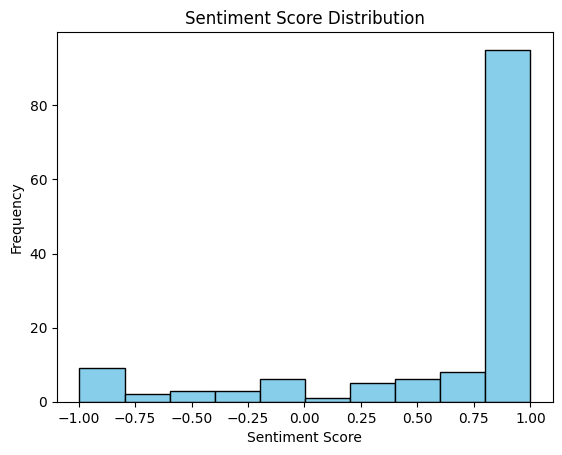

In [41]:
# Creating a sentiment histogram
plt.hist(psyke['Sentiment'], bins=10, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')

# Show the plot
plt.show()

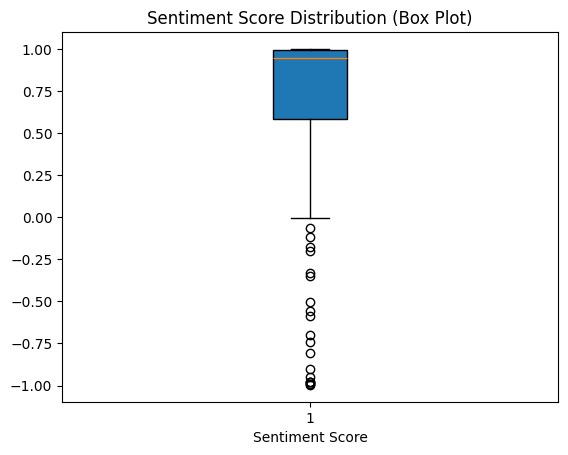

In [42]:
# Creating a box plot
plt.boxplot(psyke['Sentiment'], vert=True, patch_artist=True)

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

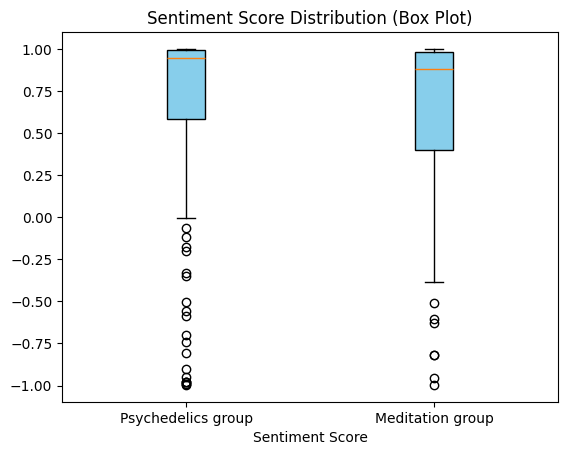

In [43]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create box plots for each DataFrame
boxplot1 = ax.boxplot(psyke['Sentiment'], vert=True, patch_artist=True, positions=[1], labels=['Psychedelics group'])
boxplot2 = ax.boxplot(medi['Sentiment'], vert=True, patch_artist=True, positions=[2], labels=['Meditation group'])

# Customize colors
colors = ['skyblue', 'lightcoral']
for box in [boxplot1, boxplot2]:
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

# Add labels and a title
ax.set_xlabel('Sentiment Score')
ax.set_title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

In [44]:
psyke_avg = round(psyke['Sentiment'].mean(), 2)
psyke_std = round(psyke['Sentiment'].std(), 2)

psyke_median = round(psyke['Sentiment'].median(), 2)


medi_avg = round(medi['Sentiment'].mean(), 2)
medi_std = round(medi['Sentiment'].std(), 2)

medi_median = round(medi['Sentiment'].median(), 2)


print('Psychedelics average sentiment score: '+str(psyke_avg)+ ' ('+str(psyke_std) +').')
print('Meditation average sentiment score: '+str(medi_avg)+ ' ('+str(medi_std)+').')
print('Psychedelics median: ' +str(psyke_median))
print('Meditation median: ' +str(medi_median))

Psychedelics average sentiment score: 0.65 (0.59).
Meditation average sentiment score: 0.58 (0.59).
Psychedelics median: 0.94
Meditation median: 0.88


In [45]:
# Performing a t-test just to show that the difference is not statistically significant.
# A t-test is suitable because there are enough rows in both datasets (central limit theorem) and the groups are independent. 

from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_val = ttest_ind(psyke['Sentiment'], medi['Sentiment'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.7200604226570054
P-value: 0.4723242757090833


In [47]:
from bayesian_bootstrap import mean, highest_density_interval

# Perform Bayesian bootstrap of the mean
psyke_bootstrap = mean(psyke['Sentiment'].values, 20000)
medi_bootstrap = mean(medi['Sentiment'].values, 20000)

# Compute the 95% highest density interval
psyke_hdi = highest_density_interval(psyke_bootstrap)
medi_hdi = highest_density_interval(medi_bootstrap)

# Print the results
print(f"Psyke mean HDI: {psyke_hdi}")
print(f"Medi mean HDI: {medi_hdi}")

Psyke mean HDI: (0.5448397610094503, 0.7373130185939178)
Medi mean HDI: (0.4405238534318403, 0.7188054429787557)
